<h2 style='color:green'>Exercise</h2>

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

In [22]:
import pandas as pd

df = pd.read_csv("carprices.csv")

df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


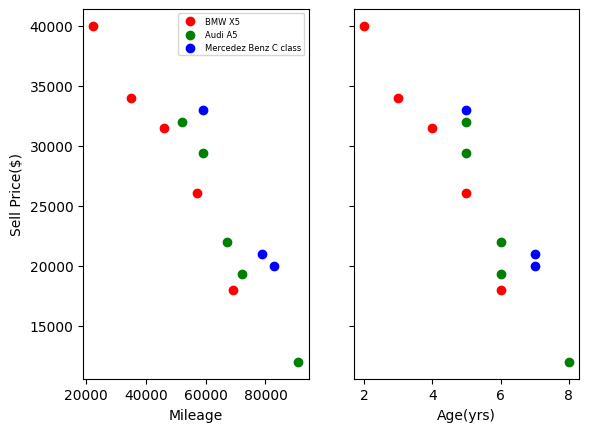

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1,2,sharey=True)
axs[0].scatter(df.Mileage[:5],df["Sell Price($)"][:5],c='r',label="BMW X5")
axs[0].scatter(df.Mileage[5:10],df["Sell Price($)"][5:10],c='g',label="Audi A5")
axs[0].scatter(df.Mileage[10:],df["Sell Price($)"][10:],c='b',label="Mercedez Benz C class")
axs[1].scatter(df["Age(yrs)"][:5],df["Sell Price($)"][:5],c='r',label="BMW X5")
axs[1].scatter(df["Age(yrs)"][5:10],df["Sell Price($)"][5:10],c='g',label="Audi A5")
axs[1].scatter(df["Age(yrs)"][10:],df["Sell Price($)"][10:],c='b',label="Mercedez Benz C class")
axs[0].set_xlabel("Mileage")
axs[0].set_ylabel("Sell Price($)")
axs[1].set_xlabel("Age(yrs)")
axs[0].legend(fontsize=6)

In [23]:
dummies = pd.get_dummies(df["Car Model"])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [24]:
data = pd.concat([df,dummies],axis="columns")
X = data.drop(["Car Model","Sell Price($)","Mercedez Benz C class"],axis="columns")
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [25]:
y = data["Sell Price($)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X,y)

LinearRegression()

In [55]:
print("Prediction 1: {}".format(mod.predict([[45000,4,0,0]])))
print("Prediction 2: {}".format(mod.predict([[86000,7,0,1]])))
print("\nModel score: {:.1f}%".format(mod.score(X,y)*100))

Prediction 1: [36991.31721061]
Prediction 2: [11080.74313219]

Model score: 94.2%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[-3.70122094e-01 -1.33245363e+03 -2.45354074e+03 -6.73820733e+03]


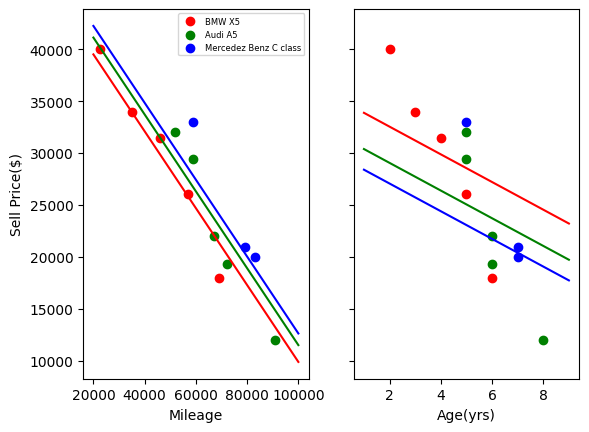

In [58]:
fig, axs = plt.subplots(1,2,sharey=True)
axs[0].scatter(df.Mileage[:5],df["Sell Price($)"][:5],c='r',label="BMW X5")
axs[0].scatter(df.Mileage[5:10],df["Sell Price($)"][5:10],c='g',label="Audi A5")
axs[0].scatter(df.Mileage[10:],df["Sell Price($)"][10:],c='b',label="Mercedez Benz C class")
axs[1].scatter(df["Age(yrs)"][:5],df["Sell Price($)"][:5],c='r',label="BMW X5")
axs[1].scatter(df["Age(yrs)"][5:10],df["Sell Price($)"][5:10],c='g',label="Audi A5")
axs[1].scatter(df["Age(yrs)"][10:],df["Sell Price($)"][10:],c='b',label="Mercedez Benz C class")
axs[0].set_xlabel("Mileage")
axs[0].set_ylabel("Sell Price($)")
axs[1].set_xlabel("Age(yrs)")
axs[0].legend(fontsize=6)

import numpy as np
x1 = np.linspace(20000,100000,10)
y1 = mod.coef_[0]*x1 + mod.coef_[1]*np.median(df["Age(yrs)"][:5]) + mod.coef_[3] + mod.intercept_
axs[0].plot(x1,y1,c='r')
y1 = mod.coef_[0]*x1 + mod.coef_[1]*np.median(df["Age(yrs)"][5:10]) + mod.coef_[2] + mod.intercept_
axs[0].plot(x1,y1,c='g')
y1 = mod.coef_[0]*x1 + mod.coef_[1]*np.median(df["Age(yrs)"][10:]) + mod.intercept_
axs[0].plot(x1,y1,c='b')

x1 = np.linspace(1,9,10)
y1 = mod.coef_[0]*np.median(df.Mileage[:5]) + mod.coef_[1]*x1 + mod.coef_[3] + mod.intercept_
axs[1].plot(x1,y1,c='r')
y1 = mod.coef_[0]*np.median(df.Mileage[5:10]) + mod.coef_[1]*x1 + mod.coef_[2] + mod.intercept_
axs[1].plot(x1,y1,c='g')
y1 = mod.coef_[0]*np.median(df.Mileage[10:]) + mod.coef_[1]*x1 + mod.intercept_
axs[1].plot(x1,y1,c='b')

print(mod.coef_)